In [ ]:
!pip install -q kaggle

In [ ]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('username')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# ! unzip /content/sms-spam-collection-dataset.zip

In [ ]:
import pandas as pd

In [ ]:
import chardet

# Detect the encoding
with open('/content/spam.csv', 'rb') as f:
    result = chardet.detect(f.read())


df = pd.read_csv('/content/spam.csv', encoding=result['encoding'])



In [ ]:
print(result['encoding'])

Windows-1252


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1238,ham,"Dear relieved of westonzoyland, all going to p...",NaN,NaN,NaN
1836,ham,Are you wet right now?,NaN,NaN,NaN
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...,NaN,NaN,NaN
5228,spam,PRIVATE! Your 2003 Account Statement for <fone...,NaN,NaN,NaN
4197,spam,Want to funk up ur fone with a weekly new tone...,NaN,NaN,NaN
5150,ham,Happy new year to u and ur family...may this n...,NaN,NaN,NaN
4112,ham,Thought we could go out for dinner. I'll treat...,NaN,NaN,NaN
4303,ham,"Good good, billy mates all gone. Just been jog...",NaN,NaN,NaN
2393,ham,"Okey doke. I'm at home, but not dressed cos la...",NaN,NaN,NaN
3975,ham,I wish u were here. I feel so alone,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
new_df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [ ]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
new_df.rename(columns={'v1':'is_spam','v2':'message'},inplace=True)

In [ ]:
new_df.head()

,is_spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
new_df['is_spam'].value_counts()

ham     4825
spam     747
Name: is_spam, dtype: int64

In [ ]:
new_df.duplicated().any()

True

In [ ]:
new_df.drop_duplicates(inplace=True)

In [ ]:
new_df.shape

(5169, 2)

In [ ]:
new_df['is_spam'].value_counts()

ham     4516
spam     653
Name: is_spam, dtype: int64

In [ ]:
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import spacy

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load SpaCy model for tokenization and lemmatization
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()

    # Strip HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Replace chat words
    chat_words = {
        "lol": "laughing out loud",
        "lmao": "laughing my ass off",
        "rofl": "rolling on the floor laughing",
        "asap": "as soon as possible",
        "gn": "good night"
    }
    text = ' '.join(chat_words.get(i, i) for i in text.split())

    # Correct spelling
    text = str(TextBlob(text).correct())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Handle emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Tokenization and Lemmatization
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]

    # Join the lemmatized tokens back into a string
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
new_df['corrected'] = new_df['message'].apply(preprocess_text)

In [ ]:
new_df.head()

,is_spam,message,corrected
0,ham,"Go until jurong point, crazy.. Available only ...",go point crazy available boris n great world l...
1,ham,Ok lar... Joking wif u oni...,ok war joke u
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wily come win cup final must may ...
3,ham,U dun say so early hor... U c already then say...,u dun say early u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",ah do not think go we live around though


In [ ]:
spam = new_df[new_df['is_spam']=='spam']

In [ ]:
spam.shape

(653, 3)

In [ ]:
ham = new_df[new_df['is_spam']=='ham']

In [ ]:
spam_string = " ".join(spam['corrected'])

In [ ]:
spam_string

'free entry 2 wily come win cup final must may 2005 text 87121 receive entry question txt rate apply 08452810075over18s freeman hey darling 3 week word back i d like fun still ok xxx st cog send 150 rev winner value network customer select receive 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 month u r entitle update late colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday day 16 stand apply reply 4 urgent 1 week free membership 100000 prize jackson txt word claim 81010 lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click link next txt message click xxxmobilemovieclubcomnqjkgighjjgcbl england v macedonia do not miss goalsteam news txt national team 87077 eg england 87077 trywale scotland 4txt120 poboxox36504w45wq 16 thank subscription ringtone mobile charge month please confirm reply yes reply charge 07732584351 roger burns mug try call reply sums free nikit

In [ ]:
ham_string = " ".join(ham['corrected'])

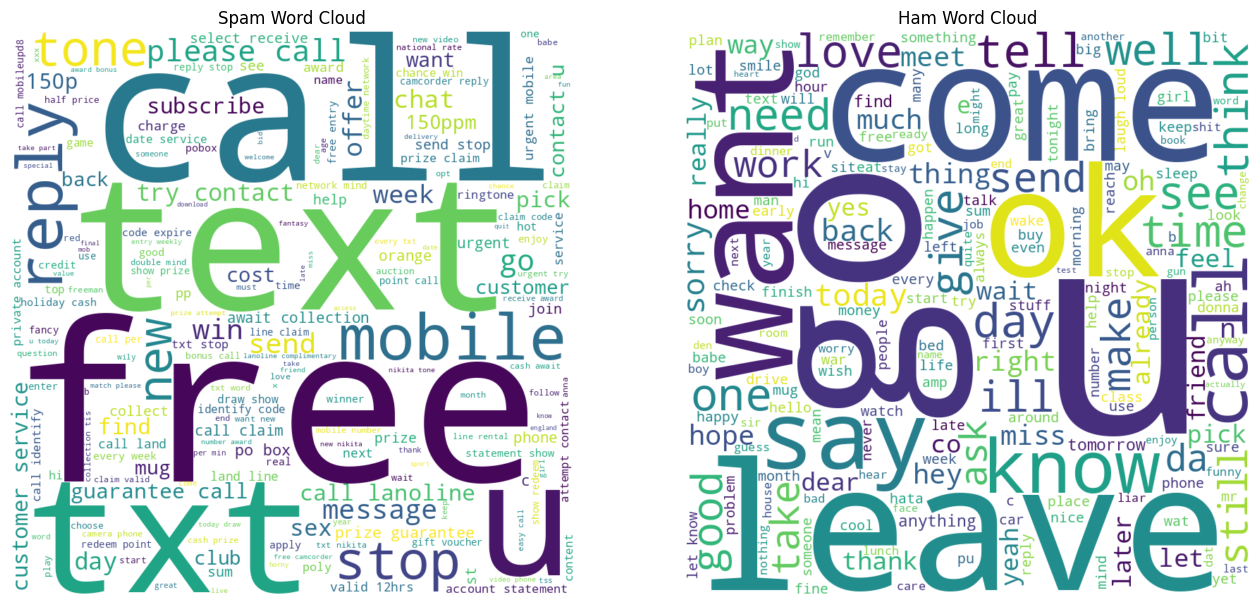

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(spam_string)
ham_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(ham_string)

# Display the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(new_df['corrected'])

In [ ]:
X.shape

(5169, 6067)

In [ ]:
Y = new_df['is_spam'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.89      0.94      3781
        spam       0.19      1.00      0.32        96

    accuracy                           0.90      3877
   macro avg       0.60      0.95      0.63      3877
weighted avg       0.98      0.90      0.93      3877

[[3380  401]
 [   0   96]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      3567
        spam       0.62      1.00      0.77       310

    accuracy                           0.95      3877
   macro avg       0.81      0.97      0.87      3877
weighted avg       0.97      0.95      0.96      3877

[[3379  188]
 [   1  309]]


In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gb = GaussianNB()
bb = BernoulliNB()
mb = MultinomialNB()


In [ ]:
gb.fit(X_train.toarray(),y_train)
y_pred3 = gb.predict(X_test.toarray())
print(classification_report(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))

              precision    recall  f1-score   support

         ham       0.88      0.96      0.92      3075
        spam       0.77      0.48      0.59       802

    accuracy                           0.86      3877
   macro avg       0.82      0.72      0.75      3877
weighted avg       0.85      0.86      0.85      3877

[[2960  115]
 [ 420  382]]


In [ ]:
bb.fit(X_train.toarray(),y_train)
y_pred4 = bb.predict(X_test.toarray())
print(classification_report(y_pred4,y_test))
print(confusion_matrix(y_pred4,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.90      0.95      3765
        spam       0.22      0.98      0.36       112

    accuracy                           0.90      3877
   macro avg       0.61      0.94      0.65      3877
weighted avg       0.98      0.90      0.93      3877

[[3378  387]
 [   2  110]]


In [ ]:
mb.fit(X_train.toarray(),y_train)
y_pred5 = mb.predict(X_test.toarray())
print(classification_report(y_pred5,y_test))
print(confusion_matrix(y_pred5,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.89      0.94      3780
        spam       0.20      1.00      0.33        97

    accuracy                           0.90      3877
   macro avg       0.60      0.95      0.64      3877
weighted avg       0.98      0.90      0.93      3877

[[3380  400]
 [   0   97]]


In [ ]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(X_train.toarray(),y_train)
y_pred6 = sv.predict(X_test.toarray())
print(classification_report(y_pred6,y_test))
print(confusion_matrix(y_pred6,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.96      3638
        spam       0.48      1.00      0.65       239

    accuracy                           0.93      3877
   macro avg       0.74      0.96      0.80      3877
weighted avg       0.97      0.93      0.94      3877

[[3379  259]
 [   1  238]]


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [ ]:
new_df.head()

,is_spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)

In [ ]:
X_res.shape

(9032, 6067)

In [ ]:
y_res

array(['ham', 'ham', 'spam', ..., 'spam', 'spam', 'spam'], dtype=object)

In [ ]:
import numpy as np
ham_count = np.count_nonzero(y_res == 'ham')
spam_count = np.count_nonzero(y_res == 'spam')

print(ham_count)
print(spam_count)

4516
4516


In [ ]:
from scipy.sparse import issparse
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score


def evaluate_models(X, y):
    lr1 = LogisticRegression(max_iter=1000)
    rf1 = RandomForestClassifier()
    gnb = GaussianNB()
    mnb = MultinomialNB()
    bnb = BernoulliNB()
    svm1 = SVC()

    models = {
        'Logistic Regression': lr1,
        'Random Forest': rf1,
        #'Gaussian Naive Bayes': gnb,
        'Multinomial Naive Bayes': mnb,
        'Bernoulli Naive Bayes': bnb,
        'Support Vector Machine': svm1
    }

    pos_label = 'ham'

    precision_scorer = make_scorer(precision_score, pos_label=pos_label)

    scores = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision'])

    for model_name, model in models.items():
        # Convert to dense array if using GaussianNB
        X_train = X.toarray() if 'NB' in model_name and issparse(X) else X

        accuracy = cross_val_score(model, X_train, y, cv=5, scoring='accuracy').mean()
        precision = cross_val_score(model, X_train, y, cv=5, scoring=precision_scorer).mean()

        scores = scores.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision}, ignore_index=True)

    return scores


In [ ]:
scores_df = evaluate_models(X_res, y_res)
print(scores_df)

<ipython-input-227-65ff763bc813>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision}, ignore_index=True)
<ipython-input-227-65ff763bc813>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision}, ignore_index=True)
<ipython-input-227-65ff763bc813>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision}, ignore_index=True)
<ipython-input-227-65ff763bc813>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

                     Model  Accuracy  Precision
0      Logistic Regression  0.981844   0.977280
1            Random Forest  0.992142   0.986008
2  Multinomial Naive Bayes  0.977193   0.984535
3    Bernoulli Naive Bayes  0.990259   0.982175
4   Support Vector Machine  0.995794   0.993947


<ipython-input-227-65ff763bc813>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision}, ignore_index=True)


# **Final Model: Support Vector Machine (SVM) since it shows the highest accuracy (99.58%) and precision (99.39%). **